## Mini-Projeto 3 - Guia de Modelagem Preditiva com Linguagem Python e TensorFlow

Neste Mini-Projeto vamos apresentar um guia básico de modelagem preditiva usando Linguagem Python e TensorFlow, o principal framework para construção de modelos de Machine Learning e Deep Learning e para construir aplicações comerciais de Inteligência Artificial.

Este é um guia básico pois o TensorFlow é um framework extenso. O TensorFlow é abordado em detalhes nos cursos da <a href="https://www.datascienceacademy.com.br/bundle/formacao-inteligencia-artificial">Formação Inteligência Artificial</a> (especialmente no curso Deep Learning Frameworks) e na <a href="https://www.datascienceacademy.com.br/bundle/formacao-inteligencia-artificial-aplicada-a-medicina">Formação IA Aplicada à Medicina</a>.

Na <a href="https://www.datascienceacademy.com.br/bundle/formacao-cientista-de-dados">Formação Cientista de Dados</a>, no curso de Machine Learning também há um módulo sobre TensorFlow. Alguns projetos com TensorFlow podem ser encontrados no curso de IA Aplicada a Finanças da <a href="https://www.datascienceacademy.com.br/bundle/formacao-engenheiro-blockchain">Formação Engenheiro Blockchain</a>.

## Instalando e Carregando Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.8


In [2]:
# Instala o TensorFlow
!pip install -q tensorflow==2.5

In [3]:
# Instala o Pydot
!pip install -q pydot

In [4]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.5.0


## Carregando os Dados

### Boston House Prices Dataset

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

#### Características:

* Número de Observções: 506
* Os primeiros 13 recursos são recursos preditivos numéricos / categóricos. 
* O último (atributo 14): o valor mediano é a variável de destino.

In [6]:
# Download dos dados
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

In [7]:
# Nomes das colunas
nomes_colunas = ['CRIM',
                 'ZN',
                 'INDUS',
                 'CHAS',
                 'NOX',
                 'RM', 
                 'AGE', 
                 'DIS',
                 'RAD',
                 'TAX',
                 'PTRATION', 
                 'B', 
                 'LSTAT', 
                 'MEDV']

In [8]:
# Carrega os dados
dataset = pd.read_csv(dataset_path, 
                      names = nomes_colunas,
                      na_values = "?", 
                      comment = '\t',
                      sep = " ", 
                      skipinitialspace = True)

In [9]:
# Shape
dataset.shape

(506, 14)

In [10]:
# Visualiza os dados
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Vamos dividir os dados em treino e teste com proporção 80/20.

In [11]:
# Split dos dados
dados_treino = dataset.sample(frac = 0.8, random_state = 0)
dados_teste = dataset.drop(dados_treino.index)

## Modelagem Preditiva - Regressão Linear Simples

Na regressão linear simples desejamos modelar a relação entre a variável dependente (y) e uma variável independente (x).

* Variável independente: 'RM'
* Variável dependente: 'MEDV'

Queremos prever o valor da mediana das casas ocupadas por proprietários com base no número de quartos.

Vamos criar um plot mostrando a relação atual entre as variáveis.

Basicamente temos $MEDV=f(RM)$ e queremos estimar a função $f()$ usando regressão linear.

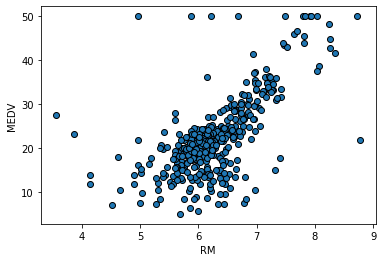

In [12]:
# Representação visual dos dados de treino
fig, ax = plt.subplots()
x = dados_treino['RM']
y = dados_treino['MEDV']
ax.scatter(x, y, edgecolors = (0, 0, 0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()

Vamos separar x e y.

In [13]:
# Divisão
x_treino = dados_treino['RM']
y_treino = dados_treino['MEDV']
x_teste = dados_teste['RM']
y_teste = dados_teste['MEDV']

## Criação do Modelo

Queremos encontrar os parâmetros (**W**) que permitem prever a saída y a partir da entrada x:

$y = w_1 x + w_0$

A fórmula acima pode ser definida com a seguinte camada densa em um modelo de rede neural artificial:

*layers.Dense(1, use_bias=True, input_shape=(1,))*

In [14]:
# Função para construir o modelo
def modelo_linear():
    
    # Cria o modelo
    model = keras.Sequential([layers.Dense(1, use_bias = True, input_shape = (1,), name = 'layer')])

    # Otimizador
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01, 
                                         beta_1 = 0.9, 
                                         beta_2 = 0.99, 
                                         epsilon = 1e-05, 
                                         amsgrad = False, 
                                         name = 'Adam')
    
    # Compila o modelo
    model.compile(loss = 'mse', 
                  optimizer = optimizer, 
                  metrics = ['mae','mse'])

    return model

MAE = Mean Absolute Error

MSE = Mean Squared Error

In [15]:
# Cria o modelo 
modelo = modelo_linear()

In [16]:
!pip  install graphviz

In [17]:
# Plot do modelo
tf.keras.utils.plot_model(modelo, 
                          to_file = 'imagens/modelo.png', 
                          show_shapes = True, 
                          show_layer_names = True,
                          rankdir = 'TB', 
                          expand_nested = False, 
                          dpi = 100)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


### Treinamento do Modelo

In [18]:
# Hiperparâmetros
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_treino.shape[0]
print('Checkpoint salvo a cada {} amostras'.format(n_samples_save))

Checkpoint salvo a cada 81000 amostras


In [19]:
# Callback
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                                 patience = n_idle_epochs, 
                                                 min_delta = 0.001)

In [20]:
# Lista para as previsões
predictions_list = []

In [21]:
# Caminho ppara salvar o checkpoint
checkpoint_path = "dados/"

In [22]:
# Create a callback that saves the model's weights every n_samples_save
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath = "dados/", 
                                                        verbose = 1, 
                                                        save_weights_only = True,
                                                        save_freq = n_samples_save)

In [23]:
# Salva a primeira versão do modelo
modelo.save_weights(checkpoint_path.format(epoch = 0))

In [24]:
# Treinamento
history = modelo.fit(x_treino, 
                     y_treino, 
                     batch_size = batch_size,
                     epochs = n_epochs, 
                     validation_split = 0.1, 
                     verbose = 1, 
                     callbacks = [earlyStopping, checkpointCallback])

Epoch 1/4000
2/2 [==============================] - 2s 255ms/step - loss: 525.0857 - mae: 21.2177 - mse: 525.0857 - val_loss: 611.2399 - val_mae: 22.4795 - val_mse: 611.2399
Epoch 2/4000
2/2 [==============================] - 0s 64ms/step - loss: 518.9070 - mae: 21.0726 - mse: 518.9070 - val_loss: 604.5865 - val_mae: 22.3339 - val_mse: 604.5865
Epoch 3/4000
2/2 [==============================] - 0s 38ms/step - loss: 512.5361 - mae: 20.9275 - mse: 512.5361 - val_loss: 597.9854 - val_mae: 22.1884 - val_mse: 597.9854
Epoch 4/4000
2/2 [==============================] - 0s 29ms/step - loss: 506.3307 - mae: 20.7824 - mse: 506.3307 - val_loss: 591.4206 - val_mae: 22.0428 - val_mse: 591.4206
Epoch 5/4000
2/2 [==============================] - 0s 34ms/step - loss: 500.1912 - mae: 20.6375 - mse: 500.1912 - val_loss: 584.8995 - val_mae: 21.8972 - val_mse: 584.8995
Epoch 6/4000
2/2 [==============================] - 0s 24ms/step - loss: 494.1743 - mae: 20.4929 - mse: 494.1743 - val_loss: 578.4354 

2/2 [==============================] - 0s 29ms/step - loss: 285.4803 - mae: 14.7750 - mse: 285.4803 - val_loss: 356.4807 - val_mae: 16.0230 - val_mse: 356.4807
Epoch 49/4000
2/2 [==============================] - 0s 25ms/step - loss: 281.6295 - mae: 14.6501 - mse: 281.6295 - val_loss: 352.3163 - val_mae: 15.9016 - val_mse: 352.3163
Epoch 50/4000
2/2 [==============================] - 0s 22ms/step - loss: 277.7716 - mae: 14.5269 - mse: 277.7716 - val_loss: 348.2014 - val_mae: 15.7807 - val_mse: 348.2014
Epoch 51/4000
2/2 [==============================] - 0s 23ms/step - loss: 273.9771 - mae: 14.4048 - mse: 273.9771 - val_loss: 344.1249 - val_mae: 15.6600 - val_mse: 344.1249
Epoch 52/4000
2/2 [==============================] - 0s 23ms/step - loss: 270.2660 - mae: 14.2832 - mse: 270.2660 - val_loss: 340.0857 - val_mae: 15.5394 - val_mse: 340.0857
Epoch 53/4000
2/2 [==============================] - 0s 26ms/step - loss: 266.5793 - mae: 14.1606 - mse: 266.5793 - val_loss: 336.0953 - val_mae

2/2 [==============================] - 0s 80ms/step - loss: 148.4528 - mae: 9.7634 - mse: 148.4528 - val_loss: 206.8842 - val_mae: 11.2035 - val_mse: 206.8842
Epoch 96/4000
2/2 [==============================] - 0s 72ms/step - loss: 146.4302 - mae: 9.6773 - mse: 146.4302 - val_loss: 204.6290 - val_mae: 11.1243 - val_mse: 204.6290
Epoch 97/4000
2/2 [==============================] - 0s 66ms/step - loss: 144.4313 - mae: 9.5924 - mse: 144.4313 - val_loss: 202.4097 - val_mae: 11.0455 - val_mse: 202.4097
Epoch 98/4000
2/2 [==============================] - 0s 87ms/step - loss: 142.4543 - mae: 9.5057 - mse: 142.4543 - val_loss: 200.2192 - val_mae: 10.9671 - val_mse: 200.2192
Epoch 99/4000
2/2 [==============================] - 0s 67ms/step - loss: 140.5510 - mae: 9.4228 - mse: 140.5510 - val_loss: 198.0515 - val_mae: 10.8886 - val_mse: 198.0515
Epoch 100/4000
2/2 [==============================] - 0s 84ms/step - loss: 138.6652 - mae: 9.3401 - mse: 138.6652 - val_loss: 195.9168 - val_mae: 10.

2/2 [==============================] - 0s 104ms/step - loss: 82.7123 - mae: 6.7559 - mse: 82.7123 - val_loss: 131.2038 - val_mae: 8.2664 - val_mse: 131.2038
Epoch 143/4000
2/2 [==============================] - 0s 109ms/step - loss: 81.8656 - mae: 6.7107 - mse: 81.8656 - val_loss: 130.1635 - val_mae: 8.2264 - val_mse: 130.1635
Epoch 144/4000
2/2 [==============================] - 0s 73ms/step - loss: 81.0366 - mae: 6.6667 - mse: 81.0366 - val_loss: 129.1469 - val_mae: 8.1868 - val_mse: 129.1469
Epoch 145/4000
2/2 [==============================] - 0s 94ms/step - loss: 80.2265 - mae: 6.6222 - mse: 80.2265 - val_loss: 128.1555 - val_mae: 8.1476 - val_mse: 128.1555
Epoch 146/4000
2/2 [==============================] - 0s 64ms/step - loss: 79.4066 - mae: 6.5783 - mse: 79.4066 - val_loss: 127.1872 - val_mae: 8.1089 - val_mse: 127.1872
Epoch 147/4000
2/2 [==============================] - 0s 71ms/step - loss: 78.6756 - mae: 6.5382 - mse: 78.6756 - val_loss: 126.2343 - val_mae: 8.0703 - val_m

Epoch 190/4000
2/2 [==============================] - 0s 87ms/step - loss: 59.4323 - mae: 5.4147 - mse: 59.4323 - val_loss: 100.7344 - val_mae: 7.0113 - val_mse: 100.7344
Epoch 191/4000
2/2 [==============================] - 0s 77ms/step - loss: 59.2181 - mae: 5.4030 - mse: 59.2181 - val_loss: 100.4094 - val_mae: 7.0010 - val_mse: 100.4094
Epoch 192/4000
2/2 [==============================] - 0s 88ms/step - loss: 59.0169 - mae: 5.3925 - mse: 59.0169 - val_loss: 100.0912 - val_mae: 6.9907 - val_mse: 100.0912
Epoch 193/4000
2/2 [==============================] - 0s 76ms/step - loss: 58.8435 - mae: 5.3827 - mse: 58.8435 - val_loss: 99.7823 - val_mae: 6.9806 - val_mse: 99.7823
Epoch 194/4000
2/2 [==============================] - 0s 98ms/step - loss: 58.6549 - mae: 5.3726 - mse: 58.6549 - val_loss: 99.4912 - val_mae: 6.9709 - val_mse: 99.4912
Epoch 195/4000
2/2 [==============================] - 0s 82ms/step - loss: 58.4885 - mae: 5.3632 - mse: 58.4885 - val_loss: 99.2159 - val_mae: 6.9616

2/2 [==============================] - 0s 92ms/step - loss: 55.3810 - mae: 5.2735 - mse: 55.3810 - val_loss: 92.9929 - val_mae: 6.8052 - val_mse: 92.9929
Epoch 239/4000
2/2 [==============================] - 0s 87ms/step - loss: 55.3598 - mae: 5.2748 - mse: 55.3598 - val_loss: 92.9373 - val_mae: 6.8049 - val_mse: 92.9373
Epoch 240/4000
2/2 [==============================] - 0s 76ms/step - loss: 55.3421 - mae: 5.2755 - mse: 55.3421 - val_loss: 92.8825 - val_mae: 6.8045 - val_mse: 92.8825
Epoch 241/4000
2/2 [==============================] - 0s 71ms/step - loss: 55.3346 - mae: 5.2772 - mse: 55.3346 - val_loss: 92.8269 - val_mae: 6.8042 - val_mse: 92.8269
Epoch 242/4000
2/2 [==============================] - 0s 83ms/step - loss: 55.3216 - mae: 5.2785 - mse: 55.3216 - val_loss: 92.7781 - val_mae: 6.8039 - val_mse: 92.7781
Epoch 243/4000
2/2 [==============================] - 0s 78ms/step - loss: 55.3103 - mae: 5.2797 - mse: 55.3103 - val_loss: 92.7364 - val_mae: 6.8036 - val_mse: 92.7364
E

2/2 [==============================] - 0s 76ms/step - loss: 55.1231 - mae: 5.3012 - mse: 55.1231 - val_loss: 92.0344 - val_mae: 6.7955 - val_mse: 92.0344
Epoch 287/4000
2/2 [==============================] - 0s 94ms/step - loss: 55.1206 - mae: 5.3011 - mse: 55.1206 - val_loss: 92.0283 - val_mae: 6.7953 - val_mse: 92.0283
Epoch 288/4000
2/2 [==============================] - 0s 108ms/step - loss: 55.1176 - mae: 5.3012 - mse: 55.1176 - val_loss: 92.0177 - val_mae: 6.7952 - val_mse: 92.0177
Epoch 289/4000
2/2 [==============================] - 0s 112ms/step - loss: 55.1167 - mae: 5.3017 - mse: 55.1167 - val_loss: 92.0063 - val_mae: 6.7950 - val_mse: 92.0063
Epoch 290/4000
2/2 [==============================] - 0s 90ms/step - loss: 55.1116 - mae: 5.3019 - mse: 55.1116 - val_loss: 91.9998 - val_mae: 6.7948 - val_mse: 91.9998
Epoch 291/4000
2/2 [==============================] - 0s 83ms/step - loss: 55.1086 - mae: 5.3020 - mse: 55.1086 - val_loss: 91.9874 - val_mae: 6.7946 - val_mse: 91.9874

2/2 [==============================] - 0s 85ms/step - loss: 54.9712 - mae: 5.3050 - mse: 54.9712 - val_loss: 91.7295 - val_mae: 6.7861 - val_mse: 91.7295
Epoch 335/4000
2/2 [==============================] - 0s 124ms/step - loss: 54.9666 - mae: 5.3039 - mse: 54.9666 - val_loss: 91.7338 - val_mae: 6.7860 - val_mse: 91.7338
Epoch 336/4000
2/2 [==============================] - 0s 87ms/step - loss: 54.9627 - mae: 5.3034 - mse: 54.9627 - val_loss: 91.7334 - val_mae: 6.7858 - val_mse: 91.7334
Epoch 337/4000
2/2 [==============================] - 0s 99ms/step - loss: 54.9588 - mae: 5.3030 - mse: 54.9588 - val_loss: 91.7407 - val_mae: 6.7856 - val_mse: 91.7407
Epoch 338/4000
2/2 [==============================] - 0s 89ms/step - loss: 54.9549 - mae: 5.3021 - mse: 54.9549 - val_loss: 91.7558 - val_mae: 6.7855 - val_mse: 91.7558
Epoch 339/4000
2/2 [==============================] - 0s 89ms/step - loss: 54.9512 - mae: 5.3007 - mse: 54.9512 - val_loss: 91.7666 - val_mae: 6.7854 - val_mse: 91.7666


2/2 [==============================] - 0s 80ms/step - loss: 54.7533 - mae: 5.3011 - mse: 54.7533 - val_loss: 91.4302 - val_mae: 6.7728 - val_mse: 91.4302
Epoch 383/4000
2/2 [==============================] - 0s 115ms/step - loss: 54.7478 - mae: 5.3009 - mse: 54.7478 - val_loss: 91.4212 - val_mae: 6.7725 - val_mse: 91.4212
Epoch 384/4000
2/2 [==============================] - 0s 96ms/step - loss: 54.7436 - mae: 5.3010 - mse: 54.7436 - val_loss: 91.4249 - val_mae: 6.7722 - val_mse: 91.4249
Epoch 385/4000
2/2 [==============================] - 0s 137ms/step - loss: 54.7345 - mae: 5.2997 - mse: 54.7345 - val_loss: 91.4475 - val_mae: 6.7721 - val_mse: 91.4475
Epoch 386/4000
2/2 [==============================] - 0s 106ms/step - loss: 54.7290 - mae: 5.2974 - mse: 54.7290 - val_loss: 91.4750 - val_mae: 6.7720 - val_mse: 91.4750
Epoch 387/4000
2/2 [==============================] - 0s 133ms/step - loss: 54.7240 - mae: 5.2951 - mse: 54.7240 - val_loss: 91.4986 - val_mae: 6.7718 - val_mse: 91.49

2/2 [==============================] - 0s 103ms/step - loss: 54.4490 - mae: 5.2735 - mse: 54.4490 - val_loss: 91.3746 - val_mae: 6.7567 - val_mse: 91.3746
Epoch 431/4000
2/2 [==============================] - 0s 104ms/step - loss: 54.4421 - mae: 5.2731 - mse: 54.4421 - val_loss: 91.3807 - val_mae: 6.7564 - val_mse: 91.3807
Epoch 432/4000
2/2 [==============================] - 0s 87ms/step - loss: 54.4331 - mae: 5.2718 - mse: 54.4331 - val_loss: 91.4025 - val_mae: 6.7561 - val_mse: 91.4025
Epoch 433/4000
2/2 [==============================] - 0s 83ms/step - loss: 54.4263 - mae: 5.2696 - mse: 54.4263 - val_loss: 91.4244 - val_mae: 6.7559 - val_mse: 91.4244
Epoch 434/4000
2/2 [==============================] - 0s 82ms/step - loss: 54.4273 - mae: 5.2679 - mse: 54.4273 - val_loss: 91.4362 - val_mae: 6.7556 - val_mse: 91.4362
Epoch 435/4000
2/2 [==============================] - 0s 83ms/step - loss: 54.4130 - mae: 5.2665 - mse: 54.4130 - val_loss: 91.4131 - val_mae: 6.7550 - val_mse: 91.4131

2/2 [==============================] - 0s 35ms/step - loss: 54.0764 - mae: 5.2705 - mse: 54.0764 - val_loss: 90.8209 - val_mae: 6.7327 - val_mse: 90.8209
Epoch 479/4000
2/2 [==============================] - 0s 24ms/step - loss: 54.0668 - mae: 5.2704 - mse: 54.0668 - val_loss: 90.8047 - val_mae: 6.7321 - val_mse: 90.8047
Epoch 480/4000
2/2 [==============================] - 0s 26ms/step - loss: 54.0592 - mae: 5.2705 - mse: 54.0592 - val_loss: 90.7979 - val_mae: 6.7316 - val_mse: 90.7979
Epoch 481/4000
2/2 [==============================] - 0s 24ms/step - loss: 54.0505 - mae: 5.2702 - mse: 54.0505 - val_loss: 90.7927 - val_mae: 6.7311 - val_mse: 90.7927
Epoch 482/4000
2/2 [==============================] - 0s 22ms/step - loss: 54.0412 - mae: 5.2695 - mse: 54.0412 - val_loss: 90.8051 - val_mae: 6.7308 - val_mse: 90.8051
Epoch 483/4000
2/2 [==============================] - 0s 24ms/step - loss: 54.0299 - mae: 5.2673 - mse: 54.0299 - val_loss: 90.8203 - val_mae: 6.7304 - val_mse: 90.8203
E

2/2 [==============================] - 0s 31ms/step - loss: 53.6362 - mae: 5.2388 - mse: 53.6362 - val_loss: 90.6170 - val_mae: 6.7082 - val_mse: 90.6170
Epoch 527/4000
2/2 [==============================] - 0s 34ms/step - loss: 53.6264 - mae: 5.2374 - mse: 53.6264 - val_loss: 90.6268 - val_mae: 6.7078 - val_mse: 90.6268
Epoch 528/4000
2/2 [==============================] - 0s 39ms/step - loss: 53.6198 - mae: 5.2350 - mse: 53.6198 - val_loss: 90.6594 - val_mae: 6.7075 - val_mse: 90.6594
Epoch 529/4000
2/2 [==============================] - 0s 25ms/step - loss: 53.6056 - mae: 5.2323 - mse: 53.6056 - val_loss: 90.6669 - val_mae: 6.7071 - val_mse: 90.6669
Epoch 530/4000
2/2 [==============================] - 0s 34ms/step - loss: 53.5953 - mae: 5.2309 - mse: 53.5953 - val_loss: 90.6661 - val_mae: 6.7066 - val_mse: 90.6661
Epoch 531/4000
2/2 [==============================] - 0s 34ms/step - loss: 53.5896 - mae: 5.2300 - mse: 53.5896 - val_loss: 90.6688 - val_mae: 6.7061 - val_mse: 90.6688
E

2/2 [==============================] - 0s 23ms/step - loss: 53.2175 - mae: 5.2328 - mse: 53.2175 - val_loss: 90.0064 - val_mae: 6.6794 - val_mse: 90.0064
Epoch 575/4000
2/2 [==============================] - 0s 27ms/step - loss: 53.2148 - mae: 5.2351 - mse: 53.2148 - val_loss: 89.9914 - val_mae: 6.6787 - val_mse: 89.9914
Epoch 576/4000
2/2 [==============================] - 0s 24ms/step - loss: 53.2084 - mae: 5.2349 - mse: 53.2084 - val_loss: 90.0008 - val_mae: 6.6783 - val_mse: 90.0008
Epoch 577/4000
2/2 [==============================] - 0s 23ms/step - loss: 53.1931 - mae: 5.2328 - mse: 53.1931 - val_loss: 90.0131 - val_mae: 6.6779 - val_mse: 90.0131
Epoch 578/4000
2/2 [==============================] - 0s 26ms/step - loss: 53.1783 - mae: 5.2305 - mse: 53.1783 - val_loss: 90.0462 - val_mae: 6.6776 - val_mse: 90.0462
Epoch 579/4000
2/2 [==============================] - 0s 41ms/step - loss: 53.1579 - mae: 5.2263 - mse: 53.1579 - val_loss: 90.1102 - val_mae: 6.6777 - val_mse: 90.1102
E

2/2 [==============================] - 0s 31ms/step - loss: 52.7390 - mae: 5.1746 - mse: 52.7390 - val_loss: 90.1864 - val_mae: 6.6564 - val_mse: 90.1864
Epoch 623/4000
2/2 [==============================] - 0s 30ms/step - loss: 52.7316 - mae: 5.1720 - mse: 52.7316 - val_loss: 90.2183 - val_mae: 6.6561 - val_mse: 90.2183
Epoch 624/4000
2/2 [==============================] - 0s 29ms/step - loss: 52.7249 - mae: 5.1698 - mse: 52.7249 - val_loss: 90.2417 - val_mae: 6.6558 - val_mse: 90.2417
Epoch 625/4000
2/2 [==============================] - 0s 30ms/step - loss: 52.7121 - mae: 5.1670 - mse: 52.7121 - val_loss: 90.2975 - val_mae: 6.6557 - val_mse: 90.2975
Epoch 626/4000
2/2 [==============================] - 0s 31ms/step - loss: 52.7066 - mae: 5.1632 - mse: 52.7066 - val_loss: 90.3722 - val_mae: 6.6557 - val_mse: 90.3722
Epoch 627/4000
2/2 [==============================] - 0s 31ms/step - loss: 52.7048 - mae: 5.1594 - mse: 52.7048 - val_loss: 90.4396 - val_mae: 6.6556 - val_mse: 90.4396
E

2/2 [==============================] - 0s 33ms/step - loss: 52.3582 - mae: 5.1403 - mse: 52.3582 - val_loss: 90.1300 - val_mae: 6.6337 - val_mse: 90.1300
Epoch 671/4000
2/2 [==============================] - 0s 29ms/step - loss: 52.3460 - mae: 5.1375 - mse: 52.3460 - val_loss: 90.1903 - val_mae: 6.6336 - val_mse: 90.1903
Epoch 672/4000
2/2 [==============================] - 0s 27ms/step - loss: 52.3466 - mae: 5.1346 - mse: 52.3466 - val_loss: 90.2402 - val_mae: 6.6334 - val_mse: 90.2402
Epoch 673/4000
2/2 [==============================] - 0s 28ms/step - loss: 52.3534 - mae: 5.1322 - mse: 52.3534 - val_loss: 90.2552 - val_mae: 6.6331 - val_mse: 90.2552
Epoch 674/4000
2/2 [==============================] - 0s 38ms/step - loss: 52.3361 - mae: 5.1312 - mse: 52.3361 - val_loss: 90.2061 - val_mae: 6.6323 - val_mse: 90.2061
Epoch 675/4000
2/2 [==============================] - 0s 27ms/step - loss: 52.3218 - mae: 5.1321 - mse: 52.3218 - val_loss: 90.1294 - val_mae: 6.6314 - val_mse: 90.1294
E

2/2 [==============================] - 0s 39ms/step - loss: 51.9372 - mae: 5.1277 - mse: 51.9372 - val_loss: 89.5277 - val_mae: 6.6063 - val_mse: 89.5277
Epoch 719/4000
2/2 [==============================] - 0s 36ms/step - loss: 51.9458 - mae: 5.1332 - mse: 51.9458 - val_loss: 89.4449 - val_mae: 6.6053 - val_mse: 89.4449
Epoch 720/4000
2/2 [==============================] - 0s 31ms/step - loss: 51.9292 - mae: 5.1364 - mse: 51.9292 - val_loss: 89.4046 - val_mae: 6.6045 - val_mse: 89.4046
Epoch 721/4000
2/2 [==============================] - 0s 31ms/step - loss: 51.9284 - mae: 5.1386 - mse: 51.9284 - val_loss: 89.3789 - val_mae: 6.6038 - val_mse: 89.3789
Epoch 722/4000
2/2 [==============================] - 0s 28ms/step - loss: 51.9171 - mae: 5.1390 - mse: 51.9171 - val_loss: 89.3874 - val_mae: 6.6034 - val_mse: 89.3874
Epoch 723/4000
2/2 [==============================] - 0s 30ms/step - loss: 51.9093 - mae: 5.1377 - mse: 51.9093 - val_loss: 89.4170 - val_mae: 6.6031 - val_mse: 89.4170
E

2/2 [==============================] - 0s 40ms/step - loss: 51.5574 - mae: 5.1163 - mse: 51.5574 - val_loss: 89.1084 - val_mae: 6.5803 - val_mse: 89.1084
Epoch 767/4000
2/2 [==============================] - 0s 27ms/step - loss: 51.5521 - mae: 5.1178 - mse: 51.5521 - val_loss: 89.0841 - val_mae: 6.5797 - val_mse: 89.0841
Epoch 768/4000
2/2 [==============================] - 0s 36ms/step - loss: 51.5477 - mae: 5.1185 - mse: 51.5477 - val_loss: 89.0691 - val_mae: 6.5791 - val_mse: 89.0691
Epoch 769/4000
2/2 [==============================] - 0s 30ms/step - loss: 51.5409 - mae: 5.1186 - mse: 51.5409 - val_loss: 89.0355 - val_mae: 6.5783 - val_mse: 89.0355
Epoch 770/4000
2/2 [==============================] - 0s 28ms/step - loss: 51.5335 - mae: 5.1204 - mse: 51.5335 - val_loss: 88.9805 - val_mae: 6.5783 - val_mse: 88.9805
Epoch 771/4000
2/2 [==============================] - 0s 26ms/step - loss: 51.5327 - mae: 5.1237 - mse: 51.5327 - val_loss: 88.9477 - val_mae: 6.5782 - val_mse: 88.9477
E

2/2 [==============================] - 0s 24ms/step - loss: 51.1898 - mae: 5.0906 - mse: 51.1898 - val_loss: 88.9399 - val_mae: 6.5573 - val_mse: 88.9399
Epoch 815/4000
2/2 [==============================] - 0s 30ms/step - loss: 51.1787 - mae: 5.0888 - mse: 51.1787 - val_loss: 88.9750 - val_mae: 6.5570 - val_mse: 88.9750
Epoch 816/4000
2/2 [==============================] - 0s 28ms/step - loss: 51.1701 - mae: 5.0856 - mse: 51.1701 - val_loss: 89.0140 - val_mae: 6.5569 - val_mse: 89.0140
Epoch 817/4000
2/2 [==============================] - 0s 25ms/step - loss: 51.1652 - mae: 5.0826 - mse: 51.1652 - val_loss: 89.0438 - val_mae: 6.5566 - val_mse: 89.0438
Epoch 818/4000
2/2 [==============================] - 0s 28ms/step - loss: 51.1535 - mae: 5.0804 - mse: 51.1535 - val_loss: 89.0581 - val_mae: 6.5562 - val_mse: 89.0581
Epoch 819/4000
2/2 [==============================] - 0s 24ms/step - loss: 51.1464 - mae: 5.0785 - mse: 51.1464 - val_loss: 89.0904 - val_mae: 6.5560 - val_mse: 89.0904
E

2/2 [==============================] - 0s 26ms/step - loss: 50.8184 - mae: 5.0476 - mse: 50.8184 - val_loss: 89.0226 - val_mae: 6.5351 - val_mse: 89.0226
Epoch 863/4000
2/2 [==============================] - 0s 45ms/step - loss: 50.8104 - mae: 5.0473 - mse: 50.8104 - val_loss: 89.0109 - val_mae: 6.5346 - val_mse: 89.0109
Epoch 864/4000
2/2 [==============================] - 0s 32ms/step - loss: 50.8012 - mae: 5.0471 - mse: 50.8012 - val_loss: 88.9848 - val_mae: 6.5339 - val_mse: 88.9848
Epoch 865/4000
2/2 [==============================] - 0s 26ms/step - loss: 50.7922 - mae: 5.0478 - mse: 50.7922 - val_loss: 88.9502 - val_mae: 6.5332 - val_mse: 88.9502
Epoch 866/4000
2/2 [==============================] - 0s 26ms/step - loss: 50.7920 - mae: 5.0499 - mse: 50.7920 - val_loss: 88.9127 - val_mae: 6.5325 - val_mse: 88.9127
Epoch 867/4000
2/2 [==============================] - 0s 26ms/step - loss: 50.7750 - mae: 5.0499 - mse: 50.7750 - val_loss: 88.9145 - val_mae: 6.5320 - val_mse: 88.9145
E

2/2 [==============================] - 0s 26ms/step - loss: 50.4493 - mae: 5.0243 - mse: 50.4493 - val_loss: 88.7750 - val_mae: 6.5102 - val_mse: 88.7750
Epoch 911/4000
2/2 [==============================] - 0s 26ms/step - loss: 50.4370 - mae: 5.0239 - mse: 50.4370 - val_loss: 88.7358 - val_mae: 6.5094 - val_mse: 88.7358
Epoch 912/4000
2/2 [==============================] - 0s 31ms/step - loss: 50.4276 - mae: 5.0249 - mse: 50.4276 - val_loss: 88.6954 - val_mae: 6.5087 - val_mse: 88.6954
Epoch 913/4000
2/2 [==============================] - 0s 35ms/step - loss: 50.4177 - mae: 5.0262 - mse: 50.4177 - val_loss: 88.6523 - val_mae: 6.5079 - val_mse: 88.6523
Epoch 914/4000
2/2 [==============================] - 0s 45ms/step - loss: 50.4181 - mae: 5.0290 - mse: 50.4181 - val_loss: 88.5939 - val_mae: 6.5070 - val_mse: 88.5939
Epoch 915/4000
2/2 [==============================] - 0s 25ms/step - loss: 50.4026 - mae: 5.0303 - mse: 50.4026 - val_loss: 88.5722 - val_mae: 6.5064 - val_mse: 88.5722
E

2/2 [==============================] - 0s 39ms/step - loss: 50.1006 - mae: 5.0206 - mse: 50.1006 - val_loss: 88.2104 - val_mae: 6.4850 - val_mse: 88.2104
Epoch 959/4000
2/2 [==============================] - 0s 30ms/step - loss: 50.0939 - mae: 5.0203 - mse: 50.0939 - val_loss: 88.2099 - val_mae: 6.4844 - val_mse: 88.2099
Epoch 960/4000
2/2 [==============================] - 0s 25ms/step - loss: 50.0866 - mae: 5.0197 - mse: 50.0866 - val_loss: 88.2070 - val_mae: 6.4839 - val_mse: 88.2070
Epoch 961/4000
2/2 [==============================] - 0s 25ms/step - loss: 50.0831 - mae: 5.0190 - mse: 50.0831 - val_loss: 88.2004 - val_mae: 6.4835 - val_mse: 88.2004
Epoch 962/4000
2/2 [==============================] - 0s 25ms/step - loss: 50.0756 - mae: 5.0199 - mse: 50.0756 - val_loss: 88.1758 - val_mae: 6.4834 - val_mse: 88.1758
Epoch 963/4000
2/2 [==============================] - 0s 28ms/step - loss: 50.0671 - mae: 5.0195 - mse: 50.0671 - val_loss: 88.1780 - val_mae: 6.4828 - val_mse: 88.1780
E

2/2 [==============================] - 0s 25ms/step - loss: 49.7521 - mae: 4.9845 - mse: 49.7521 - val_loss: 88.2582 - val_mae: 6.4623 - val_mse: 88.2582
Epoch 1007/4000
2/2 [==============================] - 0s 27ms/step - loss: 49.7455 - mae: 4.9838 - mse: 49.7455 - val_loss: 88.2557 - val_mae: 6.4618 - val_mse: 88.2557
Epoch 1008/4000
2/2 [==============================] - 0s 24ms/step - loss: 49.7380 - mae: 4.9831 - mse: 49.7380 - val_loss: 88.2642 - val_mae: 6.4614 - val_mse: 88.2642
Epoch 1009/4000
2/2 [==============================] - 0s 30ms/step - loss: 49.7321 - mae: 4.9821 - mse: 49.7321 - val_loss: 88.2787 - val_mae: 6.4610 - val_mse: 88.2787
Epoch 1010/4000
2/2 [==============================] - 0s 28ms/step - loss: 49.7406 - mae: 4.9813 - mse: 49.7406 - val_loss: 88.2947 - val_mae: 6.4606 - val_mse: 88.2947
Epoch 1011/4000
2/2 [==============================] - 0s 34ms/step - loss: 49.7211 - mae: 4.9799 - mse: 49.7211 - val_loss: 88.2477 - val_mae: 6.4599 - val_mse: 88.2

2/2 [==============================] - 0s 39ms/step - loss: 49.4183 - mae: 4.9776 - mse: 49.4183 - val_loss: 87.7765 - val_mae: 6.4388 - val_mse: 87.7765
Epoch 1055/4000
2/2 [==============================] - 0s 40ms/step - loss: 49.4093 - mae: 4.9756 - mse: 49.4093 - val_loss: 87.8021 - val_mae: 6.4378 - val_mse: 87.8021
Epoch 1056/4000
2/2 [==============================] - 0s 27ms/step - loss: 49.4020 - mae: 4.9733 - mse: 49.4020 - val_loss: 87.8322 - val_mae: 6.4368 - val_mse: 87.8322
Epoch 1057/4000
2/2 [==============================] - 0s 26ms/step - loss: 49.3936 - mae: 4.9713 - mse: 49.3936 - val_loss: 87.8653 - val_mae: 6.4357 - val_mse: 87.8653
Epoch 1058/4000
2/2 [==============================] - 0s 25ms/step - loss: 49.3840 - mae: 4.9676 - mse: 49.3840 - val_loss: 87.9325 - val_mae: 6.4357 - val_mse: 87.9325
Epoch 1059/4000
2/2 [==============================] - 0s 40ms/step - loss: 49.3765 - mae: 4.9641 - mse: 49.3765 - val_loss: 87.9900 - val_mae: 6.4357 - val_mse: 87.9

2/2 [==============================] - 0s 46ms/step - loss: 49.1011 - mae: 4.9382 - mse: 49.1011 - val_loss: 87.9325 - val_mae: 6.4251 - val_mse: 87.9325
Epoch 1103/4000
2/2 [==============================] - 0s 34ms/step - loss: 49.0954 - mae: 4.9377 - mse: 49.0954 - val_loss: 87.9302 - val_mae: 6.4249 - val_mse: 87.9302
Epoch 1104/4000
2/2 [==============================] - 0s 27ms/step - loss: 49.0898 - mae: 4.9370 - mse: 49.0898 - val_loss: 87.9276 - val_mae: 6.4246 - val_mse: 87.9276
Epoch 1105/4000
2/2 [==============================] - 0s 31ms/step - loss: 49.0818 - mae: 4.9366 - mse: 49.0818 - val_loss: 87.9015 - val_mae: 6.4233 - val_mse: 87.9015
Epoch 1106/4000
2/2 [==============================] - 0s 25ms/step - loss: 49.0731 - mae: 4.9372 - mse: 49.0731 - val_loss: 87.8508 - val_mae: 6.4210 - val_mse: 87.8508
Epoch 1107/4000
2/2 [==============================] - 0s 27ms/step - loss: 49.0655 - mae: 4.9389 - mse: 49.0655 - val_loss: 87.7905 - val_mae: 6.4183 - val_mse: 87.7

2/2 [==============================] - 0s 38ms/step - loss: 48.7806 - mae: 4.9281 - mse: 48.7806 - val_loss: 87.5530 - val_mae: 6.4008 - val_mse: 87.5530
Epoch 1151/4000
2/2 [==============================] - 0s 59ms/step - loss: 48.7745 - mae: 4.9239 - mse: 48.7745 - val_loss: 87.6433 - val_mae: 6.4045 - val_mse: 87.6433
Epoch 1152/4000
2/2 [==============================] - 0s 41ms/step - loss: 48.7775 - mae: 4.9201 - mse: 48.7775 - val_loss: 87.7206 - val_mae: 6.4075 - val_mse: 87.7206
Epoch 1153/4000
2/2 [==============================] - 0s 40ms/step - loss: 48.7756 - mae: 4.9165 - mse: 48.7756 - val_loss: 87.7614 - val_mae: 6.4090 - val_mse: 87.7614
Epoch 1154/4000
2/2 [==============================] - 0s 29ms/step - loss: 48.7697 - mae: 4.9146 - mse: 48.7697 - val_loss: 87.7705 - val_mae: 6.4092 - val_mse: 87.7705
Epoch 1155/4000
2/2 [==============================] - 0s 30ms/step - loss: 48.7649 - mae: 4.9138 - mse: 48.7649 - val_loss: 87.7756 - val_mae: 6.4093 - val_mse: 87.7

2/2 [==============================] - 0s 34ms/step - loss: 48.4862 - mae: 4.8980 - mse: 48.4862 - val_loss: 87.5207 - val_mae: 6.3908 - val_mse: 87.5207
Epoch 1199/4000
2/2 [==============================] - 0s 37ms/step - loss: 48.4778 - mae: 4.8977 - mse: 48.4778 - val_loss: 87.5194 - val_mae: 6.3906 - val_mse: 87.5194
Epoch 1200/4000
2/2 [==============================] - 0s 45ms/step - loss: 48.4716 - mae: 4.8972 - mse: 48.4716 - val_loss: 87.5143 - val_mae: 6.3902 - val_mse: 87.5143
Epoch 1201/4000
2/2 [==============================] - 0s 42ms/step - loss: 48.4664 - mae: 4.8968 - mse: 48.4664 - val_loss: 87.5073 - val_mae: 6.3897 - val_mse: 87.5073
Epoch 1202/4000
2/2 [==============================] - 0s 33ms/step - loss: 48.4583 - mae: 4.8964 - mse: 48.4583 - val_loss: 87.5084 - val_mae: 6.3896 - val_mse: 87.5084
Epoch 1203/4000
2/2 [==============================] - 0s 38ms/step - loss: 48.4521 - mae: 4.8957 - mse: 48.4521 - val_loss: 87.5007 - val_mae: 6.3891 - val_mse: 87.5

2/2 [==============================] - 0s 28ms/step - loss: 48.1655 - mae: 4.8912 - mse: 48.1655 - val_loss: 86.9905 - val_mae: 6.3643 - val_mse: 86.9905
Epoch 1247/4000
2/2 [==============================] - 0s 39ms/step - loss: 48.1602 - mae: 4.8914 - mse: 48.1602 - val_loss: 86.9792 - val_mae: 6.3637 - val_mse: 86.9792
Epoch 1248/4000
2/2 [==============================] - 0s 36ms/step - loss: 48.1543 - mae: 4.8913 - mse: 48.1543 - val_loss: 86.9573 - val_mae: 6.3630 - val_mse: 86.9573
Epoch 1249/4000
2/2 [==============================] - 0s 29ms/step - loss: 48.1481 - mae: 4.8922 - mse: 48.1481 - val_loss: 86.9227 - val_mae: 6.3619 - val_mse: 86.9227
Epoch 1250/4000
2/2 [==============================] - 0s 51ms/step - loss: 48.1465 - mae: 4.8937 - mse: 48.1465 - val_loss: 86.9033 - val_mae: 6.3612 - val_mse: 86.9033
Epoch 1251/4000
2/2 [==============================] - 0s 40ms/step - loss: 48.1434 - mae: 4.8936 - mse: 48.1434 - val_loss: 86.9028 - val_mae: 6.3609 - val_mse: 86.9

2/2 [==============================] - 0s 27ms/step - loss: 47.8759 - mae: 4.8811 - mse: 47.8759 - val_loss: 86.6625 - val_mae: 6.3443 - val_mse: 86.6625
Epoch 1295/4000
2/2 [==============================] - 0s 27ms/step - loss: 47.8639 - mae: 4.8783 - mse: 47.8639 - val_loss: 86.7102 - val_mae: 6.3453 - val_mse: 86.7102
Epoch 1296/4000
2/2 [==============================] - 0s 28ms/step - loss: 47.8526 - mae: 4.8747 - mse: 47.8526 - val_loss: 86.7735 - val_mae: 6.3466 - val_mse: 86.7735
Epoch 1297/4000
2/2 [==============================] - 0s 41ms/step - loss: 47.8378 - mae: 4.8698 - mse: 47.8378 - val_loss: 86.8450 - val_mae: 6.3480 - val_mse: 86.8450
Epoch 1298/4000
2/2 [==============================] - 0s 37ms/step - loss: 47.8289 - mae: 4.8652 - mse: 47.8289 - val_loss: 86.9314 - val_mae: 6.3497 - val_mse: 86.9314
Epoch 1299/4000
2/2 [==============================] - 0s 43ms/step - loss: 47.8289 - mae: 4.8604 - mse: 47.8289 - val_loss: 87.0138 - val_mae: 6.3513 - val_mse: 87.0

2/2 [==============================] - 0s 30ms/step - loss: 47.5755 - mae: 4.8435 - mse: 47.5755 - val_loss: 86.7564 - val_mae: 6.3350 - val_mse: 86.7564
Epoch 1343/4000
2/2 [==============================] - 0s 34ms/step - loss: 47.5654 - mae: 4.8443 - mse: 47.5654 - val_loss: 86.7461 - val_mae: 6.3345 - val_mse: 86.7461
Epoch 1344/4000
2/2 [==============================] - 0s 28ms/step - loss: 47.5588 - mae: 4.8440 - mse: 47.5588 - val_loss: 86.7474 - val_mae: 6.3343 - val_mse: 86.7474
Epoch 1345/4000
2/2 [==============================] - 0s 31ms/step - loss: 47.5555 - mae: 4.8431 - mse: 47.5555 - val_loss: 86.7529 - val_mae: 6.3342 - val_mse: 86.7529
Epoch 1346/4000
2/2 [==============================] - 0s 29ms/step - loss: 47.5460 - mae: 4.8425 - mse: 47.5460 - val_loss: 86.7324 - val_mae: 6.3334 - val_mse: 86.7324
Epoch 1347/4000
2/2 [==============================] - 0s 31ms/step - loss: 47.5405 - mae: 4.8430 - mse: 47.5405 - val_loss: 86.7130 - val_mae: 6.3327 - val_mse: 86.7

2/2 [==============================] - 0s 28ms/step - loss: 47.2845 - mae: 4.8269 - mse: 47.2845 - val_loss: 86.5340 - val_mae: 6.3177 - val_mse: 86.5340
Epoch 1391/4000
2/2 [==============================] - 0s 25ms/step - loss: 47.2795 - mae: 4.8261 - mse: 47.2795 - val_loss: 86.5433 - val_mae: 6.3177 - val_mse: 86.5433
Epoch 1392/4000
2/2 [==============================] - 0s 26ms/step - loss: 47.2748 - mae: 4.8251 - mse: 47.2748 - val_loss: 86.5377 - val_mae: 6.3173 - val_mse: 86.5377
Epoch 1393/4000
2/2 [==============================] - 0s 28ms/step - loss: 47.2666 - mae: 4.8251 - mse: 47.2666 - val_loss: 86.5077 - val_mae: 6.3164 - val_mse: 86.5077
Epoch 1394/4000
2/2 [==============================] - 0s 27ms/step - loss: 47.2644 - mae: 4.8262 - mse: 47.2644 - val_loss: 86.4740 - val_mae: 6.3154 - val_mse: 86.4740
Epoch 1395/4000
2/2 [==============================] - 0s 31ms/step - loss: 47.2597 - mae: 4.8274 - mse: 47.2597 - val_loss: 86.4643 - val_mae: 6.3149 - val_mse: 86.4

2/2 [==============================] - 0s 35ms/step - loss: 47.0256 - mae: 4.8064 - mse: 47.0256 - val_loss: 86.4811 - val_mae: 6.3053 - val_mse: 86.4811
Epoch 1439/4000
2/2 [==============================] - 0s 32ms/step - loss: 47.0199 - mae: 4.8040 - mse: 47.0199 - val_loss: 86.5319 - val_mae: 6.3061 - val_mse: 86.5319
Epoch 1440/4000
2/2 [==============================] - 0s 26ms/step - loss: 47.0221 - mae: 4.8016 - mse: 47.0221 - val_loss: 86.5866 - val_mae: 6.3071 - val_mse: 86.5866
Epoch 1441/4000
2/2 [==============================] - 0s 30ms/step - loss: 47.0162 - mae: 4.7993 - mse: 47.0162 - val_loss: 86.6106 - val_mae: 6.3074 - val_mse: 86.6106
Epoch 1442/4000
2/2 [==============================] - 0s 42ms/step - loss: 47.0124 - mae: 4.7981 - mse: 47.0124 - val_loss: 86.6172 - val_mae: 6.3073 - val_mse: 86.6172
Epoch 1443/4000
2/2 [==============================] - 0s 37ms/step - loss: 47.0081 - mae: 4.7975 - mse: 47.0081 - val_loss: 86.6082 - val_mae: 6.3069 - val_mse: 86.6

2/2 [==============================] - 0s 33ms/step - loss: 46.7738 - mae: 4.7924 - mse: 46.7738 - val_loss: 86.2045 - val_mae: 6.2874 - val_mse: 86.2045
Epoch 1487/4000
2/2 [==============================] - 0s 37ms/step - loss: 46.7679 - mae: 4.7927 - mse: 46.7679 - val_loss: 86.1998 - val_mae: 6.2870 - val_mse: 86.1998
Epoch 1488/4000
2/2 [==============================] - 0s 28ms/step - loss: 46.7642 - mae: 4.7923 - mse: 46.7642 - val_loss: 86.2019 - val_mae: 6.2869 - val_mse: 86.2019
Epoch 1489/4000
2/2 [==============================] - 0s 28ms/step - loss: 46.7576 - mae: 4.7917 - mse: 46.7576 - val_loss: 86.1846 - val_mae: 6.2862 - val_mse: 86.1846
Epoch 1490/4000
2/2 [==============================] - 0s 43ms/step - loss: 46.7543 - mae: 4.7923 - mse: 46.7543 - val_loss: 86.1563 - val_mae: 6.2853 - val_mse: 86.1563
Epoch 1491/4000
2/2 [==============================] - 0s 47ms/step - loss: 46.7477 - mae: 4.7928 - mse: 46.7477 - val_loss: 86.1491 - val_mae: 6.2849 - val_mse: 86.1

2/2 [==============================] - 0s 36ms/step - loss: 46.5329 - mae: 4.7725 - mse: 46.5329 - val_loss: 86.1092 - val_mae: 6.2741 - val_mse: 86.1092
Epoch 1535/4000
2/2 [==============================] - 0s 30ms/step - loss: 46.5258 - mae: 4.7748 - mse: 46.5258 - val_loss: 86.0520 - val_mae: 6.2726 - val_mse: 86.0520
Epoch 1536/4000
2/2 [==============================] - 0s 25ms/step - loss: 46.5274 - mae: 4.7772 - mse: 46.5274 - val_loss: 85.9984 - val_mae: 6.2711 - val_mse: 85.9984
Epoch 1537/4000
2/2 [==============================] - 0s 34ms/step - loss: 46.5229 - mae: 4.7791 - mse: 46.5229 - val_loss: 85.9689 - val_mae: 6.2701 - val_mse: 85.9689
Epoch 1538/4000
2/2 [==============================] - 0s 38ms/step - loss: 46.5213 - mae: 4.7803 - mse: 46.5213 - val_loss: 85.9557 - val_mae: 6.2696 - val_mse: 85.9557
Epoch 1539/4000
2/2 [==============================] - 0s 38ms/step - loss: 46.5154 - mae: 4.7801 - mse: 46.5154 - val_loss: 85.9659 - val_mae: 6.2696 - val_mse: 85.9

2/2 [==============================] - 0s 34ms/step - loss: 46.2916 - mae: 4.7532 - mse: 46.2916 - val_loss: 86.1454 - val_mae: 6.2632 - val_mse: 86.1454
Epoch 1583/4000
2/2 [==============================] - 0s 52ms/step - loss: 46.2944 - mae: 4.7513 - mse: 46.2944 - val_loss: 86.1866 - val_mae: 6.2639 - val_mse: 86.1866
Epoch 1584/4000
2/2 [==============================] - 0s 31ms/step - loss: 46.2897 - mae: 4.7500 - mse: 46.2897 - val_loss: 86.1991 - val_mae: 6.2639 - val_mse: 86.1991
Epoch 1585/4000
2/2 [==============================] - 0s 53ms/step - loss: 46.2888 - mae: 4.7495 - mse: 46.2888 - val_loss: 86.2290 - val_mae: 6.2643 - val_mse: 86.2290
Epoch 1586/4000
2/2 [==============================] - 0s 34ms/step - loss: 46.2880 - mae: 4.7481 - mse: 46.2880 - val_loss: 86.2875 - val_mae: 6.2653 - val_mse: 86.2875
Epoch 1587/4000
2/2 [==============================] - 0s 38ms/step - loss: 46.2848 - mae: 4.7467 - mse: 46.2848 - val_loss: 86.3016 - val_mae: 6.2654 - val_mse: 86.3

2/2 [==============================] - 0s 45ms/step - loss: 46.0711 - mae: 4.7377 - mse: 46.0711 - val_loss: 86.0464 - val_mae: 6.2498 - val_mse: 86.0464
Epoch 1631/4000
2/2 [==============================] - 0s 30ms/step - loss: 46.0747 - mae: 4.7355 - mse: 46.0747 - val_loss: 86.0773 - val_mae: 6.2502 - val_mse: 86.0773
Epoch 1632/4000
2/2 [==============================] - 0s 35ms/step - loss: 46.0664 - mae: 4.7348 - mse: 46.0664 - val_loss: 86.0649 - val_mae: 6.2497 - val_mse: 86.0649
Epoch 1633/4000
2/2 [==============================] - 0s 32ms/step - loss: 46.0614 - mae: 4.7348 - mse: 46.0614 - val_loss: 86.0577 - val_mae: 6.2493 - val_mse: 86.0577
Epoch 1634/4000
2/2 [==============================] - 0s 30ms/step - loss: 46.0564 - mae: 4.7345 - mse: 46.0564 - val_loss: 86.0596 - val_mae: 6.2491 - val_mse: 86.0596
Epoch 1635/4000
2/2 [==============================] - 0s 28ms/step - loss: 46.0515 - mae: 4.7338 - mse: 46.0515 - val_loss: 86.0624 - val_mae: 6.2490 - val_mse: 86.0

2/2 [==============================] - 0s 40ms/step - loss: 45.8487 - mae: 4.7290 - mse: 45.8487 - val_loss: 85.7133 - val_mae: 6.2312 - val_mse: 85.7133
Epoch 1679/4000
2/2 [==============================] - 0s 36ms/step - loss: 45.8490 - mae: 4.7279 - mse: 45.8490 - val_loss: 85.7478 - val_mae: 6.2318 - val_mse: 85.7478
Epoch 1680/4000
2/2 [==============================] - 0s 33ms/step - loss: 45.8445 - mae: 4.7256 - mse: 45.8445 - val_loss: 85.7513 - val_mae: 6.2316 - val_mse: 85.7513
Epoch 1681/4000
2/2 [==============================] - 0s 40ms/step - loss: 45.8358 - mae: 4.7254 - mse: 45.8358 - val_loss: 85.7236 - val_mae: 6.2308 - val_mse: 85.7236
Epoch 1682/4000
2/2 [==============================] - 0s 47ms/step - loss: 45.8349 - mae: 4.7265 - mse: 45.8349 - val_loss: 85.7008 - val_mae: 6.2300 - val_mse: 85.7008
Epoch 1683/4000
2/2 [==============================] - 0s 36ms/step - loss: 45.8282 - mae: 4.7264 - mse: 45.8282 - val_loss: 85.6996 - val_mae: 6.2298 - val_mse: 85.6

2/2 [==============================] - 0s 45ms/step - loss: 45.6496 - mae: 4.7067 - mse: 45.6496 - val_loss: 85.7614 - val_mae: 6.2212 - val_mse: 85.7614
Epoch 1727/4000
2/2 [==============================] - 0s 29ms/step - loss: 45.6391 - mae: 4.7079 - mse: 45.6391 - val_loss: 85.7070 - val_mae: 6.2198 - val_mse: 85.7070
Epoch 1728/4000
2/2 [==============================] - 0s 28ms/step - loss: 45.6304 - mae: 4.7091 - mse: 45.6304 - val_loss: 85.6547 - val_mae: 6.2184 - val_mse: 85.6547
Epoch 1729/4000
2/2 [==============================] - 0s 36ms/step - loss: 45.6266 - mae: 4.7106 - mse: 45.6266 - val_loss: 85.5962 - val_mae: 6.2168 - val_mse: 85.5962
Epoch 1730/4000
2/2 [==============================] - 0s 33ms/step - loss: 45.6202 - mae: 4.7120 - mse: 45.6202 - val_loss: 85.5450 - val_mae: 6.2154 - val_mse: 85.5450
Epoch 1731/4000
2/2 [==============================] - 0s 47ms/step - loss: 45.6277 - mae: 4.7146 - mse: 45.6277 - val_loss: 85.4946 - val_mae: 6.2140 - val_mse: 85.4

2/2 [==============================] - 0s 45ms/step - loss: 45.4301 - mae: 4.6975 - mse: 45.4301 - val_loss: 85.5525 - val_mae: 6.2052 - val_mse: 85.5525
Epoch 1775/4000
2/2 [==============================] - 0s 31ms/step - loss: 45.4309 - mae: 4.6962 - mse: 45.4309 - val_loss: 85.5870 - val_mae: 6.2058 - val_mse: 85.5870
Epoch 1776/4000
2/2 [==============================] - 0s 37ms/step - loss: 45.4247 - mae: 4.6949 - mse: 45.4247 - val_loss: 85.5976 - val_mae: 6.2058 - val_mse: 85.5976
Epoch 1777/4000
2/2 [==============================] - 0s 46ms/step - loss: 45.4245 - mae: 4.6942 - mse: 45.4245 - val_loss: 85.6079 - val_mae: 6.2058 - val_mse: 85.6079
Epoch 1778/4000
2/2 [==============================] - 0s 58ms/step - loss: 45.4177 - mae: 4.6937 - mse: 45.4177 - val_loss: 85.5876 - val_mae: 6.2052 - val_mse: 85.5876
Epoch 1779/4000
2/2 [==============================] - 0s 40ms/step - loss: 45.4127 - mae: 4.6940 - mse: 45.4127 - val_loss: 85.5575 - val_mae: 6.2043 - val_mse: 85.5

2/2 [==============================] - 0s 30ms/step - loss: 45.2466 - mae: 4.6828 - mse: 45.2466 - val_loss: 85.4683 - val_mae: 6.1928 - val_mse: 85.4683
Epoch 1823/4000
2/2 [==============================] - 0s 30ms/step - loss: 45.2392 - mae: 4.6828 - mse: 45.2392 - val_loss: 85.4314 - val_mae: 6.1917 - val_mse: 85.4314
Epoch 1824/4000
2/2 [==============================] - 0s 29ms/step - loss: 45.2367 - mae: 4.6837 - mse: 45.2367 - val_loss: 85.4012 - val_mae: 6.1908 - val_mse: 85.4012
Epoch 1825/4000
2/2 [==============================] - 0s 29ms/step - loss: 45.2318 - mae: 4.6841 - mse: 45.2318 - val_loss: 85.3869 - val_mae: 6.1903 - val_mse: 85.3869
Epoch 1826/4000
2/2 [==============================] - 0s 28ms/step - loss: 45.2289 - mae: 4.6839 - mse: 45.2289 - val_loss: 85.3802 - val_mae: 6.1899 - val_mse: 85.3802
Epoch 1827/4000
2/2 [==============================] - 0s 29ms/step - loss: 45.2246 - mae: 4.6841 - mse: 45.2246 - val_loss: 85.3560 - val_mae: 6.1892 - val_mse: 85.3

2/2 [==============================] - 0s 30ms/step - loss: 45.0592 - mae: 4.6738 - mse: 45.0592 - val_loss: 85.2768 - val_mae: 6.1779 - val_mse: 85.2768
Epoch 1871/4000
2/2 [==============================] - 0s 32ms/step - loss: 45.0543 - mae: 4.6726 - mse: 45.0543 - val_loss: 85.3150 - val_mae: 6.1785 - val_mse: 85.3150
Epoch 1872/4000
2/2 [==============================] - 0s 31ms/step - loss: 45.0508 - mae: 4.6713 - mse: 45.0508 - val_loss: 85.3582 - val_mae: 6.1793 - val_mse: 85.3582
Epoch 1873/4000
2/2 [==============================] - 0s 31ms/step - loss: 45.0466 - mae: 4.6702 - mse: 45.0466 - val_loss: 85.4036 - val_mae: 6.1800 - val_mse: 85.4036
Epoch 1874/4000
2/2 [==============================] - 0s 30ms/step - loss: 45.0429 - mae: 4.6688 - mse: 45.0429 - val_loss: 85.4658 - val_mae: 6.1812 - val_mse: 85.4658
Epoch 1875/4000
2/2 [==============================] - 0s 28ms/step - loss: 45.0498 - mae: 4.6677 - mse: 45.0498 - val_loss: 85.5379 - val_mae: 6.1825 - val_mse: 85.5

In [25]:
# Métricas do histórico de treinamento
print('keys:', history.history.keys())

keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


MSE = Mean Squared Error

In [26]:
# Retornando os valores desejados para o plot
mse = np.asarray(history.history['mse'])
val_mse = np.asarray(history.history['val_mse'])

In [27]:
# Prepara os valores para o dataframe
num_values = (len(mse))
values = np.zeros((num_values, 2), dtype = float)
values[:,0] = mse
values[:,1] = val_mse

In [28]:
# Cria o dataframe
steps = pd.RangeIndex(start = 0, stop = num_values)
df = pd.DataFrame(values, steps, columns = ["MSE em Treino", "MSE em Validação"])

In [29]:
df.head()

,MSE em Treino,MSE em Validação
0,525.085693,611.239929
1,518.906982,604.586548
2,512.536133,597.985413
3,506.330750,591.420593
4,500.191223,584.899475


<AxesSubplot:>

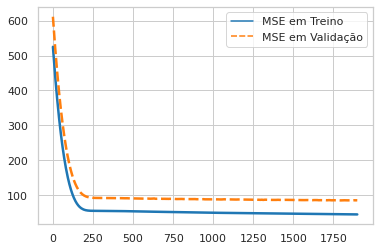

In [30]:
# Plot
sns.set(style = "whitegrid")
sns.lineplot(data = df, palette = "tab10", linewidth  = 2.5)

In [31]:
# Previsões com o modelo treinado
previsoes = modelo.predict(x_teste).flatten()

In [32]:
# Imprime as previsões
previsoes

array([20.987942, 18.678692, 23.787548, 21.375668, 20.680038, 20.77127 ,
       24.357735, 21.92875 , 21.136189, 20.953732, 25.617844, 23.342804,
       21.335754, 22.687092, 23.183155, 21.655056, 26.706898, 23.274384,
       29.038956, 20.115559, 20.5546  , 21.084873, 19.431335, 20.987942,
       19.214664, 23.422634, 22.823936, 14.841348, 17.56683 , 34.50703 ,
       21.54102 , 18.524742, 20.161175, 22.761215, 31.0289  , 24.175278,
       21.837517, 27.681915, 25.526615, 31.656105, 27.27708 , 30.145115,
       31.530663, 17.56683 , 23.006393, 23.205963, 18.644482, 23.462547,
       36.382942, 34.638172, 18.456322, 34.062286, 30.606964, 25.674862,
       23.548073, 22.761215, 25.874428, 27.510857, 24.5573  , 24.198082,
       23.109028, 19.300194, 23.331402, 22.766918, 21.176102, 20.36644 ,
       21.301544, 22.173927, 21.689266, 21.60374 , 26.758213, 24.665634,
       11.659715, 14.579062, 17.487003, 23.274384, 17.846222, 18.290966,
       23.308594, 21.552425, 20.372139, 25.714775, 

# Fim